In [2]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt

In [4]:
import seaborn as sns

In [5]:
df=pd.read_csv("C:\\Users\\saran\\Downloads\\seattle-weather.csv")

In [6]:
df.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


<Axes: xlabel='precipitation', ylabel='Count'>

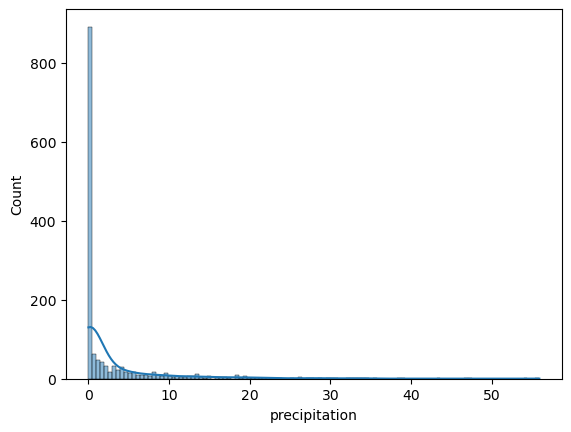

In [7]:
sns.histplot(df['precipitation'], kde=True)

In [8]:
df['precipitation'].describe()


count    1461.000000
mean        3.029432
std         6.680194
min         0.000000
25%         0.000000
50%         0.000000
75%         2.800000
max        55.900000
Name: precipitation, dtype: float64

In [9]:
for col in ['temp_max','temp_min','wind']:
    df[f'{col}_d'] = pd.qcut(df[col], q=4, labels=['low', 'medium', 'high', 'veryhigh'])


In [10]:
df.head()

,date,precipitation,temp_max,temp_min,wind,weather,temp_max_d,temp_min_d,wind_d
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle,medium,medium,veryhigh
1,2012-01-02,10.9,10.6,2.8,4.5,rain,low,low,veryhigh
2,2012-01-03,0.8,11.7,7.2,2.3,rain,medium,medium,medium
3,2012-01-04,20.3,12.2,5.6,4.7,rain,medium,medium,veryhigh
4,2012-01-05,1.3,8.9,2.8,6.1,rain,low,low,veryhigh


In [11]:
df.describe()


,precipitation,temp_max,temp_min,wind
count,1461.000000,1461.000000,1461.000000,1461.000000
mean,3.029432,16.439083,8.234771,3.241136
std,6.680194,7.349758,5.023004,1.437825
min,0.000000,-1.600000,-7.100000,0.400000
25%,0.000000,10.600000,4.400000,2.200000
50%,0.000000,15.600000,8.300000,3.000000
75%,2.800000,22.200000,12.200000,4.000000
max,55.900000,35.600000,18.300000,9.500000


In [12]:
def precipitation_discretizer(value):
    if value<=2.80:
        return 'low'
    elif value>2.80 and value<=6.80:
        return 'medium'
    else:
        return 'high'

In [13]:
df['precipitation_d']=df['precipitation'].apply(precipitation_discretizer)

In [14]:
X=df[['weather','temp_max_d',	'temp_min_d',	'wind_d',	'precipitation_d']]

In [15]:
X.head()

,weather,temp_max_d,temp_min_d,wind_d,precipitation_d
0,drizzle,medium,medium,veryhigh,low
1,rain,low,low,veryhigh,high
2,rain,medium,medium,medium,low
3,rain,medium,medium,veryhigh,high
4,rain,low,low,veryhigh,low


In [16]:
X['weather'].value_counts()

weather
rain       641
sun        640
fog        101
drizzle     53
snow        26
Name: count, dtype: int64

In [17]:
X.dtypes

weather              object
temp_max_d         category
temp_min_d         category
wind_d             category
precipitation_d      object
dtype: object

In [18]:
X = X.astype(str)

In [19]:
X.dtypes

weather            object
temp_max_d         object
temp_min_d         object
wind_d             object
precipitation_d    object
dtype: object

In [20]:
X['concat_col']=X['weather']+'_'+ X['precipitation_d']+'_'+ X['wind_d']+'_'+ X['temp_max_d']

In [21]:
X

,weather,temp_max_d,temp_min_d,wind_d,precipitation_d,concat_col
0,drizzle,medium,medium,veryhigh,low,drizzle_low_veryhigh_medium
1,rain,low,low,veryhigh,high,rain_high_veryhigh_low
2,rain,medium,medium,medium,low,rain_low_medium_medium
3,rain,medium,medium,veryhigh,high,rain_high_veryhigh_medium
4,rain,low,low,veryhigh,low,rain_low_veryhigh_low
...,...,...,...,...,...,...
1456,rain,low,low,medium,high,rain_high_medium_low
1457,rain,low,low,low,low,rain_low_low_low
1458,fog,low,low,medium,low,fog_low_medium_low
1459,sun,low,low,high,low,sun_low_high_low


In [22]:
!pip install hmmlearn

In [23]:
from hmmlearn.hmm import CategoricalHMM

In [24]:
model = CategoricalHMM(n_components=3)

In [25]:
from sklearn.preprocessing import LabelEncoder

In [26]:
le = LabelEncoder()

In [27]:
le.fit(X['concat_col'].to_list())

LabelEncoder()

In [29]:
le.transform(['drizzle_low_veryhigh_medium'])

array([12])

In [30]:
def label_encoder_output(element):
    return le.transform([element])[0]

In [32]:
label_encoder_output('drizzle_low_veryhigh_medium')

np.int64(12)

In [33]:
X['concat_col_label_encoded']=X['concat_col'].apply(label_encoder_output)

In [34]:
X

,weather,temp_max_d,temp_min_d,wind_d,precipitation_d,concat_col,concat_col_label_encoded
0,drizzle,medium,medium,veryhigh,low,drizzle_low_veryhigh_medium,12
1,rain,low,low,veryhigh,high,rain_high_veryhigh_low,41
2,rain,medium,medium,medium,low,rain_low_medium_medium,53
3,rain,medium,medium,veryhigh,high,rain_high_veryhigh_medium,42
4,rain,low,low,veryhigh,low,rain_low_veryhigh_low,56
...,...,...,...,...,...,...,...
1456,rain,low,low,medium,high,rain_high_medium_low,37
1457,rain,low,low,low,low,rain_low_low_low,48
1458,fog,low,low,medium,low,fog_low_medium_low,23
1459,sun,low,low,high,low,sun_low_high_low,87


In [35]:
sequence_of_labels=X['concat_col_label_encoded'].to_list()

# HOME WORK 1 UNDERSTAND HMM , fit, decode, high level overview of the algorithms, you will come across algos like viterbi, balm welch, research these say from youtube, wiki, or any other source 

In [36]:
model.fit([sequence_of_labels])

CategoricalHMM(n_components=3, n_features=np.int64(102),
               random_state=RandomState(MT19937) at 0x169AF536740)

In [37]:
model.decode([sequence_of_labels])

(-5288.470103258234, array([1, 1, 1, ..., 1, 1, 1]))

In [38]:
model.decode([sequence_of_labels])[1][:20]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [39]:
X['hidden_state']=model.decode([sequence_of_labels])[1]

In [40]:
X

,weather,temp_max_d,temp_min_d,wind_d,precipitation_d,concat_col,concat_col_label_encoded,hidden_state
0,drizzle,medium,medium,veryhigh,low,drizzle_low_veryhigh_medium,12,1
1,rain,low,low,veryhigh,high,rain_high_veryhigh_low,41,1
2,rain,medium,medium,medium,low,rain_low_medium_medium,53,1
3,rain,medium,medium,veryhigh,high,rain_high_veryhigh_medium,42,1
4,rain,low,low,veryhigh,low,rain_low_veryhigh_low,56,1
...,...,...,...,...,...,...,...,...
1456,rain,low,low,medium,high,rain_high_medium_low,37,1
1457,rain,low,low,low,low,rain_low_low_low,48,1
1458,fog,low,low,medium,low,fog_low_medium_low,23,1
1459,sun,low,low,high,low,sun_low_high_low,87,1


# HOME WORK 2: INTERPRET THESE HIDDEN STATES (CLASS PROJECT 1)
- use distributions ,plots , any analytics you can think of make sense of these latent hidden states
- i.e. making sense of the model.
- -play with number of hidden states until the model is meaningful

In [41]:
model.transmat_

array([[0.01851238, 0.02190939, 0.95957822],
       [0.00342066, 0.98750245, 0.00907689],
       [0.85332572, 0.00415078, 0.1425235 ]])

In [42]:
#

In [43]:
model.emissionprob_

array([[2.15474398e-24, 7.15781462e-18, 1.10877312e-02, 8.08208775e-03,
        1.98537504e-24, 2.89907990e-03, 2.03098482e-02, 7.87657328e-03,
        3.01473722e-21, 4.65953640e-21, 5.02045165e-10, 6.46330993e-16,
        2.26459557e-23, 2.92727390e-03, 8.73928223e-03, 1.25420440e-29,
        8.57792271e-25, 6.53665062e-03, 1.23609109e-02, 4.23271177e-17,
        3.30418534e-16, 1.39694631e-02, 2.74314903e-04, 1.89483322e-17,
        2.76989551e-03, 1.49576670e-02, 1.08113629e-21, 2.98894057e-11,
        8.24352824e-03, 5.80221760e-03, 1.16183062e-15, 6.26239568e-03,
        6.35100487e-17, 1.73861041e-02, 1.20775818e-22, 9.56204542e-07,
        5.73868634e-03, 4.24367580e-17, 9.56142136e-03, 1.17093286e-02,
        1.05379670e-02, 6.45480856e-10, 7.27291722e-04, 4.44644952e-02,
        7.08277083e-22, 4.11868340e-04, 4.20339205e-03, 2.78398920e-02,
        4.24299919e-15, 6.24131316e-03, 1.87385289e-02, 3.65257575e-02,
        1.07401532e-17, 1.30162344e-02, 1.17679218e-02, 3.291515

# HOME WORK 3: Model Optimization
- learn aic , bic evalution metrics
-iterate modelling to optimize for evaluation metrics

In [44]:
# Total Categories in categorical columns

In [45]:
X

,weather,temp_max_d,temp_min_d,wind_d,precipitation_d,concat_col,concat_col_label_encoded,hidden_state
0,drizzle,medium,medium,veryhigh,low,drizzle_low_veryhigh_medium,12,1
1,rain,low,low,veryhigh,high,rain_high_veryhigh_low,41,1
2,rain,medium,medium,medium,low,rain_low_medium_medium,53,1
3,rain,medium,medium,veryhigh,high,rain_high_veryhigh_medium,42,1
4,rain,low,low,veryhigh,low,rain_low_veryhigh_low,56,1
...,...,...,...,...,...,...,...,...
1456,rain,low,low,medium,high,rain_high_medium_low,37,1
1457,rain,low,low,low,low,rain_low_low_low,48,1
1458,fog,low,low,medium,low,fog_low_medium_low,23,1
1459,sun,low,low,high,low,sun_low_high_low,87,1
